# imports

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml
import glob

import sys
sys.path.insert(0, r"../helper")

from visualisation.colour import *

# Settings and data

In [2]:
# Find the directory with the last version
tmp = "../examples/example_results/lightning_logs/counter_seems_to_work/version_*"
directories = glob.glob(tmp)
version_numbers = [int(d.split('version_')[-1]) for d in directories]
last_version = max(version_numbers)  # Get the largest version number
the_dir = tmp.replace("*", str(last_version))
print(the_dir)

tmp_path = os.path.join(the_dir, "final_plots")
os.makedirs(tmp_path, exist_ok=True)

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

../examples/example_results/lightning_logs/counter_seems_to_work/version_3


,lr-SGD,step,counter,val_acc,val_f1_macro,val_f1_micro,val_prec,val_rec,val_ce_loss,val_loss,...,train_ci_max_decent3,train_cc,train_acc,train_f1_macro,train_f1_micro,train_prec,train_rec,train_ce_loss,train_loss,train_decent2_first_weight_end
0,0.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,624,1.0,0.481556,0.467429,0.63,0.512778,0.481556,1.283144,1.283144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,624,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.976576,0.239012,0.594995,0.579602,0.7042,0.619546,0.594995,0.824689,2.019749,-0.788096
3,0.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,624,2.0,0.458444,0.478847,0.60,0.572667,0.458444,1.210383,1.210383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,624,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.108184,0.234663,0.595243,0.582709,0.7092,0.624374,0.595243,0.818086,1.991403,-0.808790
6,0.1,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1249,3.0,0.488111,0.489498,0.61,0.537206,0.488111,1.219605,1.219605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1249,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.108184,0.235205,0.597065,0.579209,0.7098,0.617205,0.597065,0.810403,1.986426,-0.769468
9,0.1,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[['counter', 'train_decent2_first_weight_start', 'unpruned']].head(10)

,counter,train_decent2_first_weight_start,unpruned
0,NaN,NaN,NaN
1,1.0,NaN,NaN
2,1.0,-0.804993,4368.0
3,NaN,NaN,NaN
4,2.0,NaN,NaN
5,2.0,-0.788096,4147.0
6,NaN,NaN,NaN
7,3.0,NaN,NaN
8,3.0,-0.808790,NaN
9,NaN,NaN,NaN


In [4]:
df.columns.tolist()

['lr-SGD',
 'step',
 'counter',
 'val_acc',
 'val_f1_macro',
 'val_f1_micro',
 'val_prec',
 'val_rec',
 'val_ce_loss',
 'val_loss',
 'epoch',
 'unpruned',
 'stage',
 'train_decent2_first_weight_start',
 'train_cc_max_decent3',
 'train_ci_max_decent3',
 'train_cc',
 'train_acc',
 'train_f1_macro',
 'train_f1_micro',
 'train_prec',
 'train_rec',
 'train_ce_loss',
 'train_loss',
 'train_decent2_first_weight_end']

## hyperparams

In [5]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
hyperparams = yaml.load(stream, Loader=yaml.Loader)
hyperparams["kwargs"]["train_kwargs"]["training_stages"]

[1, 5, 5, 2]

In [6]:
cc_metric = hyperparams['kwargs']['model_kwargs']['cc_metric']
ci_metric = hyperparams['kwargs']['model_kwargs']['ci_metric']

# weight

C:\Users\Prinzessin\anaconda3\envs\feta\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


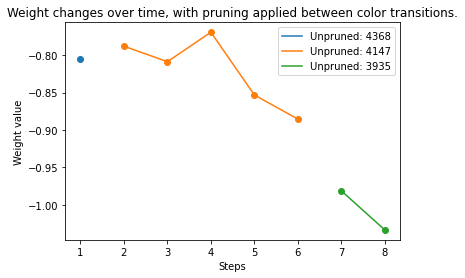

In [7]:

val_df = df[['counter', 'train_decent2_first_weight_start', 'unpruned']] # .dropna()

# val_df = pd.DataFrame(val_df)

val_df['unpruned'] = val_df['unpruned'].ffill()

val_df = val_df.dropna()

# Drop NaN values in the 'unpruned' column
# df_filtered = val_df.dropna(subset=['unpruned'])

# Create a plot
fig, ax = plt.subplots()


# grouped.sort_values('mygroups', ascending=False)

# Group by 'unpruned' and plot each group
for i, (label, group) in enumerate(val_df.groupby('unpruned', sort=False)):
    ax.scatter(group['counter'], group['train_decent2_first_weight_start'])
    ax.plot(group['counter'], group['train_decent2_first_weight_start'], label=f'Unpruned: {int(label)}')

# Set labels and show legend
ax.set_xlabel('Steps')
ax.set_ylabel('Weight value')
ax.legend()
plt.title('Weight changes over time, with pruning applied between color transitions.')

plt.savefig(os.path.join(tmp_path, 'weight_progression.png'))


plt.show()

In [8]:
for i in val_df.groupby('unpruned', sort=False):
    print("*")
    print(i)

*
(4368.0,    counter  train_decent2_first_weight_start  unpruned
2      1.0                         -0.804993    4368.0)
*
(4147.0,     counter  train_decent2_first_weight_start  unpruned
5       2.0                         -0.788096    4147.0
8       3.0                         -0.808790    4147.0
11      4.0                         -0.769468    4147.0
14      5.0                         -0.853260    4147.0
17      6.0                         -0.885455    4147.0)
*
(3935.0,     counter  train_decent2_first_weight_start  unpruned
20      7.0                         -0.981327    3935.0
23      8.0                         -1.033521    3935.0)


# Loss

## combined loss

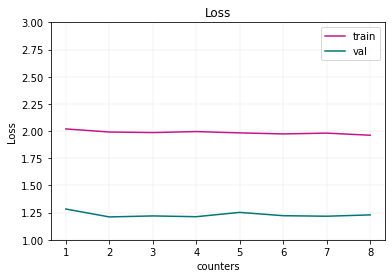

In [9]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_loss']].dropna()
x_val = val_df['counter']
y_val = val_df['val_loss']

train_df = df[['counter', 'train_loss']].dropna()
x_train = train_df['counter']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([1,3])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_loss.png'))

# Show the plot
plt.show()



## ce loss

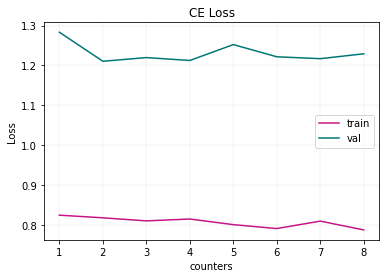

In [10]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_ce_loss']].dropna()
x_val = val_df['counter']
y_val = val_df['val_ce_loss']

train_df = df[['counter', 'train_ce_loss']].dropna()
x_train = train_df['counter']
y_train = train_df['train_ce_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Loss')
plt.title('CE Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_ce_loss.png'))

# Show the plot
plt.show()



## cc-ci loss term

### cc

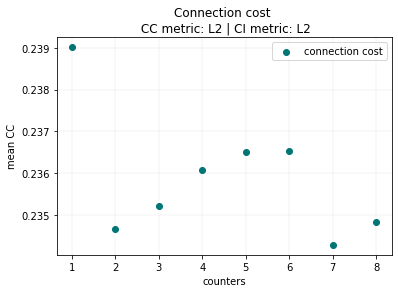

In [11]:
# todo: see how this changes without cc in loss and random pruning!!

import matplotlib.pyplot as plt

train_df = df[['counter', 'train_cc']].dropna()
x_train = train_df['counter']
y_train = train_df['train_cc']


# Create a line plot
plt.scatter(x_train, y_train, label="connection cost", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0.9374,0.9378])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_cc.png'))


# Show the plot
plt.show()


### unpruned

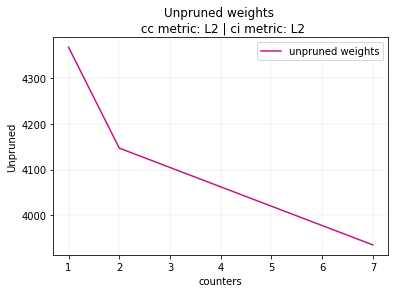

In [12]:
import matplotlib.pyplot as plt

train_df = df[['counter', 'unpruned']].dropna()
x_train = train_df['counter']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights", color=variint_map_b.colors[-1])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_unpruned.png'))


# Show the plot
plt.show()


### cc vs unpruned

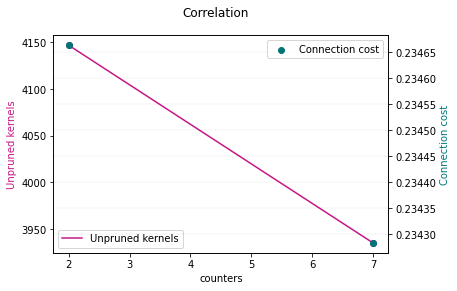

In [13]:
import matplotlib.pyplot as plt
import numpy as np

train_df = df[['counter', 'unpruned', 'train_cc']].dropna().iloc[1:]
x = train_df['counter']
y1 = train_df['unpruned']
y2 = train_df['train_cc']


# Create a figure and a primary axis
fig, ax1 = plt.subplots()

# Plot the line on the primary y-axis (values 0-1)
ax1.plot(x, y1, color=variint_map_b.colors[-1], label='Unpruned kernels')
ax1.scatter(x, y1, color=variint_map_b.colors[-1])
ax1.set_xlabel('counters')
ax1.set_ylabel('Unpruned kernels', color=variint_map_b.colors[-1])
ax1.tick_params(axis='y') # , labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the scatter on the secondary y-axis (values around 8000)
ax2.scatter(x, y2, color=variint_map_b.colors[0], label='Connection cost')
ax2.set_ylabel('Connection cost', color=variint_map_b.colors[0])
ax2.tick_params(axis='y') # , labelcolor='red')

# Add a title and show the legend
fig.suptitle('Correlation')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

plt.grid(color='k', linestyle='-', linewidth=0.05)


# Display the plot
plt.savefig(os.path.join(tmp_path, 'correlation_pruning_cc.png'))
plt.show()

### cc max, ci max, cc-ci, unpruned

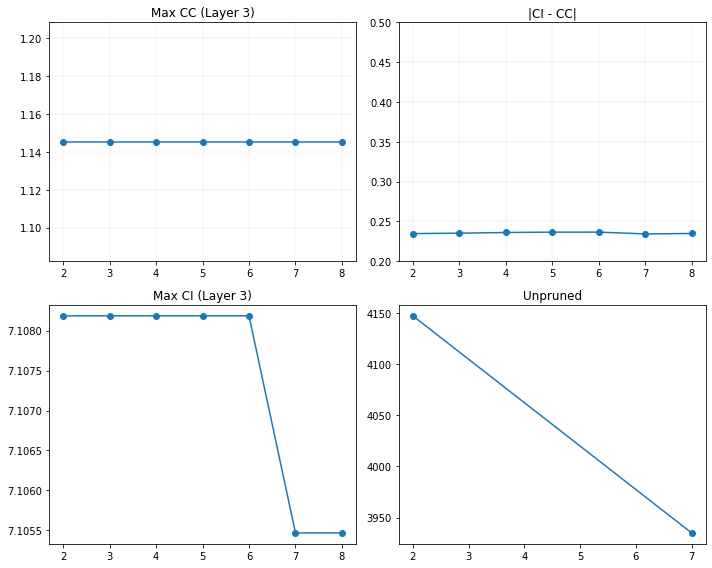

In [14]:
import matplotlib.pyplot as plt
import numpy as np

train_df = df[['counter', 'train_cc_max_decent3']].dropna().iloc[1:]
x1 = train_df['counter']
y1 = train_df['train_cc_max_decent3']

#train_df = df[['counter', 'train_cc_mean']].dropna()
#x2 = train_df['counter']
#y2 = train_df['train_cc_mean']

train_df = df[['counter', 'train_ci_max_decent3']].dropna().iloc[1:]
x3 = train_df['counter']
y3 = train_df['train_ci_max_decent3']

#train_df = df[['counter', 'train_ci_mean']].dropna()
#x4 = train_df['counter']
#y4 = train_df['train_ci_mean']

train_df = df[['counter', 'unpruned']].dropna().iloc[1:]
x5 = train_df['counter']
y5 = train_df['unpruned']

train_df = df[['counter', 'train_cc']].dropna().iloc[1:]
x6 = train_df['counter']
y6 = train_df['train_cc']


fig, axes = plt.subplots(2, 2, figsize=(10, 8))


# Plot each graph
axes[0, 0].plot(x1, y1)
axes[0, 0].scatter(x1, y1)
axes[0, 0].set_title("Max CC (Layer 3)")
axes[0, 0].grid(color='k', linestyle='-', linewidth=0.05)


#axes[0, 1].plot(x2, y2)
#axes[0, 1].scatter(x2, y2)
#axes[0, 1].set_title("Norm CC") # what is mean? is it not normalised??

axes[1, 0].plot(x3, y3)
axes[1, 0].scatter(x3, y3)
axes[1, 0].set_title("Max CI (Layer 3)")
# axes[1, 0].set_ylim(-10, 10)  # Limit y-axis for tangent

#axes[1, 1].plot(x4, y4)
#axes[1, 1].scatter(x4, y4)
#axes[1, 1].set_title("Norm CI")

axes[0, 1].plot(x6, y6)
axes[0, 1].scatter(x6, y6)
axes[0, 1].set_title("|CI - CC|")
axes[0, 1].set_ylim(0.2, 0.5) #  0.27)
axes[0, 1].grid(color='k', linestyle='-', linewidth=0.05)

axes[1, 1].plot(x5, y5)
axes[1, 1].scatter(x5, y5)
axes[1, 1].set_title("Unpruned")





# Adjust layout
plt.tight_layout()

# Display the plot
plt.savefig(os.path.join(tmp_path, 'mean_max_ci_cc.png'))
plt.show()

# metrics

## accuracy

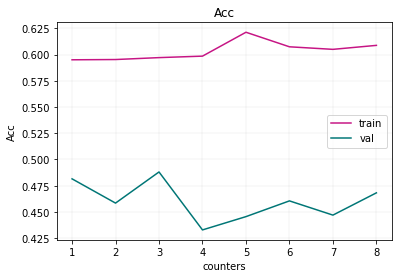

In [15]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_acc']].dropna()
x_val = val_df['counter']
y_val = val_df['val_acc']

train_df = df[['counter', 'train_acc']].dropna()
x_train = train_df['counter']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_acc.png'))


# Show the plot
plt.show()


## f1

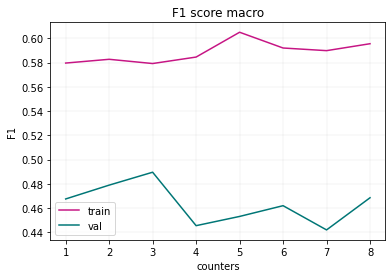

In [16]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_f1_macro']].dropna()
x_val = val_df['counter']
y_val = val_df['val_f1_macro']

train_df = df[['counter', 'train_f1_macro']].dropna()
x_train = train_df['counter']
y_train = train_df['train_f1_macro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('F1')
plt.title('F1 score macro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_macro.png'))

# Show the plot
plt.show()


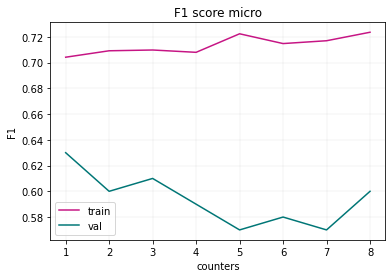

In [17]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_f1_micro']].dropna()
x_val = val_df['counter']
y_val = val_df['val_f1_micro']

train_df = df[['counter', 'train_f1_micro']].dropna()
x_train = train_df['counter']
y_train = train_df['train_f1_micro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('F1')
plt.title('F1 score micro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_micro.png'))

# Show the plot
plt.show()


## precision

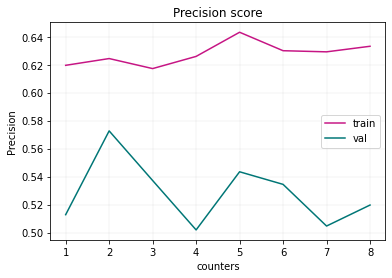

In [18]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_prec']].dropna()
x_val = val_df['counter']
y_val = val_df['val_prec']

train_df = df[['counter', 'train_prec']].dropna()
x_train = train_df['counter']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
#ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_prec.png'))


# Show the plot
plt.show()


## recall

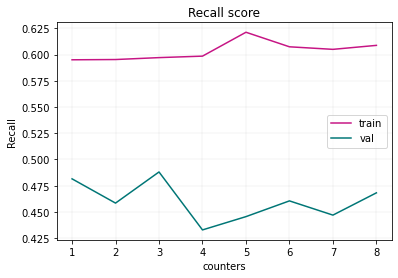

In [19]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['counter', 'val_rec']].dropna()
x_val = val_df['counter']
y_val = val_df['val_rec']

train_df = df[['counter', 'train_rec']].dropna()
x_train = train_df['counter']
y_train = train_df['train_rec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('counters')
plt.ylabel('Recall')
plt.title('Recall score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
#ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_rec.png'))


# Show the plot
plt.show()
